In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats
from scipy.stats import shapiro

In [2]:
# MODEL LIBRARY
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#classification_report LIBRARY
from sklearn.metrics import classification_report

In [4]:
# READ DATASET 
cancer=pd.read_csv('cancer.csv')

cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
#DROP THE UNWANTED COLUMNS
cancer=cancer.drop('Unnamed: 32',axis=1)
df=cancer

In [6]:
#INFORMATION OF A DATASET
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#CALCULATIND & SUMM THE NULL VALUE 
cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# USE COLUMNS
cols=[
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',    
    'compactness_mean',    
    'concavity_mean',    
    'concave points_mean', 
    'symmetry_mean',       
    'fractal_dimension_mean'
]

In [9]:
x=df[cols]

x=x.drop('diagnosis', axis=1)
y=df['diagnosis']
# Diagnosis (M = malignant, B = benign)
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [10]:
# LOGISTIC REGRESSION MODEL

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [11]:
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(455, 10)

(455,)

(114, 10)

(114,)

In [12]:
#Fitting the Model (Logistic Regression)
#model instance
model=LogisticRegression()

logistic_fit=model.fit(x_train,y_train)

# prediction
prediction=model.predict(x_test)

#classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           B       0.93      0.95      0.94        66
           M       0.93      0.90      0.91        48

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [13]:
conf_mat=metrics.confusion_matrix(y_test, prediction)
print('Confusion Matrix : ', conf_mat)
print()

Accuracy_score=metrics.accuracy_score(y_test,prediction) 
print('Accuracy Score : ', Accuracy_score) 
print()

print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[63  3]
 [ 5 43]]

Accuracy Score :  0.9298245614035088

Accuracy in Percentage :  92 %


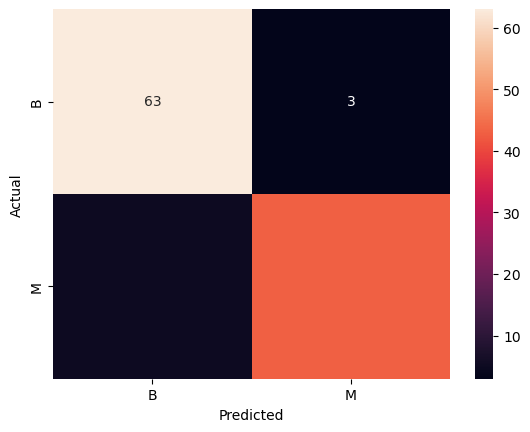

In [43]:
conf_mat=pd.crosstab(y_test, prediction, rownames=['Actual'],colnames=['Predicted'])  
sns.heatmap(conf_mat, annot=True)
plt.show()

In [15]:
conf_mat

Predicted,B,M
Actual,,
B,63,3
M,5,43


<H1><U><CENTER>Precision</CENTER></U></H1>
<H2>Precision measures the proportion of correctly predicted positive instances out of all
predicted positive instances. It focuses on the accuracy of positive predictions. Precision is
calculated as the ratio of true positives (correctly predicted positives) to the sum of true
positives and false positives (incorrectly predicted positives).<H2>

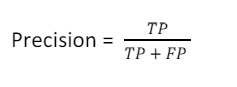

<UPPER><B><U><H1><CENTER>Recall or Sensitivity or True Positive Rate</CENTER></H1></U></B></UPPER>
<H2>Recall measures the proportion of correctly predicted positive instances out of all actual
positive instances. It focuses on the model's ability to find all positive instances. Recall is
calculated as the ratio of true positives to the sum of true positives and false negatives
(missed positives).</H2>

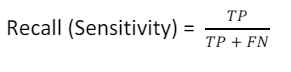

<UPPER><B><U><H1><CENTER>F1 Score</CENTER></H1></U></B></UPPER>
<H2>The F1 score combines precision and recall into a single metric, providing a balanced
evaluation. It is the harmonic mean of precision and recall, calculated as 2 * (precision *
recall) / (precision + recall). The F1 score is useful when the class distribution is imbalanced.</H2>

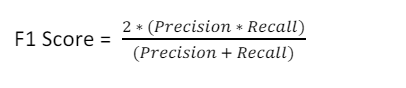

<UPPER><B><U><H1><CENTER>Specificity or True Negative Rate</CENTER></H1></U></B></UPPER>
<H2>Specificity measures the proportion of correctly predicted negative instances out of all actual
negative instances. It focuses on the model's ability to identify negative instances. Specificity
is calculated as the ratio of true negatives (correctly predicted negatives) to the sum of true
negatives and false positives (incorrectly predicted negatives).</H2>

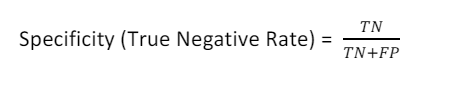